In [28]:
# cats amor dogs

In [29]:
import os, shutil



In [30]:
original_dataset_dir = 'Z:\\codeplay\\Chollet-masterclass\\ch5\\cats and dogs\\PetImages'

In [31]:
base_dir = 'Z:\\codeplay\\Chollet-masterclass\\ch5\\cats and dogs\\cat_and_dogs_small'


In [1]:

train_dir = os.path.join(base_dir, 'train')


validation_dir = os.path.join(base_dir, 'validation')

train
test_dir = os.path.join(base_dir, 'test')




NameError: name 'os' is not defined

In [33]:
#os.mkdir(base_dir)
#os.mkdir(train_dir )
#os.mkdir(validation_dir)
#os.mkdir(test_dir)


In [34]:
train_cats_dir = os.path.join(train_dir, 'cats')


In [35]:
train_dogs_dir = os.path.join(train_dir, 'dogs')


In [36]:
validation_cats_dir = os.path.join(validation_dir, 'cats')


In [37]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [38]:
test_cats_dir = os.path.join(test_dir, 'cats')


In [39]:
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [40]:
#os.mkdir(train_cats_dir)
#os.mkdir(train_dogs_dir)
#os.mkdir(validation_cats_dir)
#os.mkdir(validation_dogs_dir)
#os.mkdir(test_cats_dir)
#os.mkdir(test_dogs_dir)

In [2]:
# the following cells are for copying images to create a smaller  subset of images

fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [49]:
## prepped the datasets

In [50]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))

total training cat images:  1000


In [52]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W1206 00:46:23.985136  2200 deprecation_wrapper.py:119] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [55]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])

W1206 00:50:04.289097  2200 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [56]:
# things to do in data preprocessing
# read picture files
# decode the jpeg content to RGB frid of pixels
# Convert these into floating point tensors
# Rescale the pixel values from 0 t 255 to 0,1 interval

In [57]:
from keras.preprocessing.image import ImageDataGenerator

# rescales all images 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [58]:
# to access train_generator
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [59]:
#since we are using generator here we have to use something known as fit generator


In [60]:
# steps_per_epoch defineshow many samples to check for each epoch before moving on to next epoch
# similarly vaidation_steps argument for validation data

In [63]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 13s 134ms/step - loss: 0.6921 - acc: 0.5325 - val_loss: 0.6786 - val_acc: 0.5980
Epoch 2/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6702 - acc: 0.5985 - val_loss: 0.7473 - val_acc: 0.6190
Epoch 3/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6346 - acc: 0.6375 - val_loss: 0.6981 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5877 - acc: 0.6910 - val_loss: 0.6221 - val_acc: 0.6520
Epoch 5/30
100/100 [==============================] - 6s 56ms/step - loss: 0.5519 - acc: 0.7170 - val_loss: 0.5299 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5139 - acc: 0.7430 - val_loss: 0.4994 - val_acc: 0.7040
Epoch 7/30
100/100 [==============================] - 6s 56ms/step - loss: 0.4806 - acc: 0.7640 - val_loss: 0.5033 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 6s 59ms/step 

In [64]:
model.save('cats_and_dogs_small_1.h5')

In [65]:
# plotting accuracy and loss model

<Figure size 432x288 with 0 Axes>

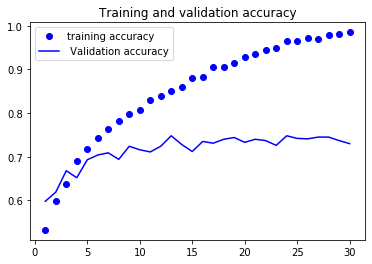

<Figure size 432x288 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1)

plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label = ' Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

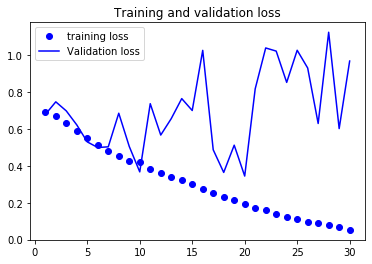

In [68]:
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()